# 第5部　統計的推定

## 5章　正規母集団から派生した確率分布

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：シミュレーションの準備

In [3]:
# 平均4、標準偏差0.8の正規分布を使いまわす
# なお、muとsigmaの数値を変えても、以下の結果はほとんど変化しない
mu = 4
sigma = 0.8
population = stats.norm(loc=mu, scale=sigma)

In [4]:
# サンプルサイズ
n = 5

# 標本抽出
np.random.seed(1)
sample = population.rvs(size=n)
sample

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 ,
       4.6923261 ])

### 実装：χ2分布

#### Pythonにおける扱い

In [5]:
# 確率密度関数
round(stats.chi2.pdf(x=2, df=n - 1), 3)

0.184

In [6]:
# 累積分布関数
round(stats.chi2.cdf(x=2, df=n - 1), 3)

0.264

In [7]:
# パーセント点
round(stats.chi2.ppf(q=0.5, df=n - 1), 3)

3.357

#### シミュレーション

In [8]:
# サンプルサイズ
n = 5

# 乱数の種
np.random.seed(1)

# χ2値を格納する入れ物
chi2_value_array = np.zeros(10000)

# シミュレーションの実行
for i in range(0, 10000):
    sample = population.rvs(size=n)
    u2 = np.var(sample, ddof=1)     # 不偏分散
    chi2 = (n - 1) * u2 / sigma**2  # χ2値
    chi2_value_array[i] = chi2

In [9]:
# χ2分布

# 確率変数
x = np.arange(start=0, stop=20.1, step=0.1)

# χ2分布の確率密度
chi2_distribution = stats.chi2.pdf(x=x, df=n - 1)

# データフレームにまとめる
chi2_df = pd.DataFrame({
    'x': x,
    'chi2_distribution': chi2_distribution
})

print(chi2_df.head(3))

     x  chi2_distribution
0  0.0           0.000000
1  0.1           0.023781
2  0.2           0.045242


<AxesSubplot:xlabel='x', ylabel='Density'>

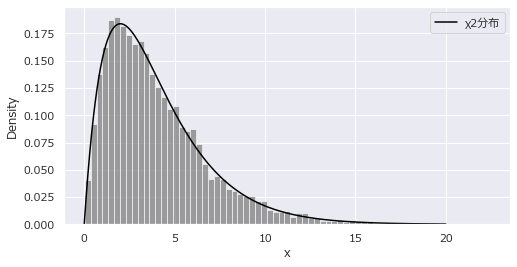

In [10]:
# ヒストグラム
sns.histplot(chi2_value_array, color='gray', stat='density')

# χ2分布
sns.lineplot(x='x', y='chi2_distribution', 
             data=chi2_df, color='black',
             label='χ2分布')

### 実装：標本平均の標準化

In [11]:
# サンプルサイズ
n = 3

# 乱数の種
np.random.seed(1)

# z値を格納する入れ物
z_value_array = np.zeros(10000)

# シミュレーションの実行
for i in range(0, 10000):
    sample = population.rvs(size=n)
    x_bar = np.mean(sample)            # 標本平均
    bar_sigma = sigma / np.sqrt(n)     # 標本平均の標準偏差
    z_value_array[i]  = (x_bar - mu) / bar_sigma   # z値

In [12]:
# 標準正規分布

# 確率変数
x = np.arange(start=-6, stop=6.1, step=0.1)

# 標準正規分布の確率密度
z_distribution = stats.norm.pdf(x=x, loc=0, scale=1)

# データフレームにまとめる
z_df = pd.DataFrame({
    'x': x,
    'z_distribution': z_distribution
})

print(z_df.head(3))

     x  z_distribution
0 -6.0    6.075883e-09
1 -5.9    1.101576e-08
2 -5.8    1.977320e-08


(-6.0, 6.0)

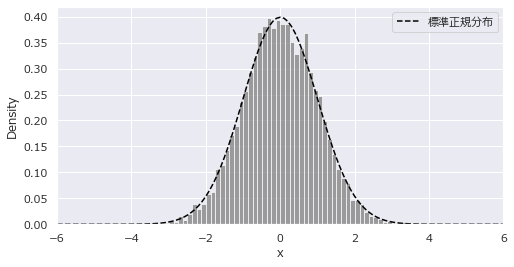

In [13]:
# z値のヒストグラム
sns.histplot(z_value_array, color='gray', stat='density')

# 標準正規分布
sns.lineplot(x='x', y='z_distribution', data=z_df,
             color='black', linestyle='dashed',
             label='標準正規分布')

# X軸範囲
plt.xlim(-6, 6)

### 実装：t分布

#### Pythonにおける扱い

In [14]:
# 確率密度関数
round(stats.t.pdf(x=2, df=n - 1), 3)

0.068

In [15]:
# 累積分布関数
round(stats.t.cdf(x=2, df=n - 1), 3)

0.908

In [16]:
# パーセント点
round(stats.t.ppf(q=0.5, df=n - 1), 3)

0.0

#### シミュレーション

In [17]:
# 乱数の種
np.random.seed(1)

# t値を格納する入れ物
t_value_array = np.zeros(10000)

# シミュレーションの実行
for i in range(0, 10000):
    sample = population.rvs(size=n)
    x_bar = np.mean(sample)                # 標本平均
    u = np.std(sample, ddof=1)             # 標準偏差
    se = u / np.sqrt(n)                    # 標準誤差
    t_value_array[i]  = (x_bar - mu) / se  # t値

In [18]:
# t分布

# t分布の確率密度
t_distribution = stats.t.pdf(x=x, df=n - 1)

# データフレームにまとめる
t_df = pd.DataFrame({
    'x': x,
    't_distribution': t_distribution
})

print(t_df.head(3))

     x  t_distribution
0 -6.0        0.004269
1 -5.9        0.004478
2 -5.8        0.004700


(-6.0, 6.0)

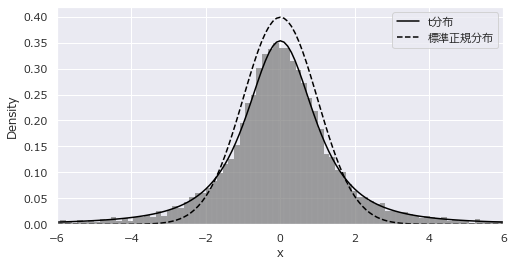

In [19]:
# t値のヒストグラム
sns.histplot(t_value_array, color='gray', stat='density')

# t分布
sns.lineplot(x='x', y='t_distribution', 
             data=t_df, color='black',
             label='t分布')

# 標準正規分布
sns.lineplot(x='x', y='z_distribution', data=z_df,
             color='black', linestyle='dashed',
             label='標準正規分布')

# X軸範囲
plt.xlim(-6, 6)

### 実装：F分布

#### Pythonにおける扱い

In [20]:
# サンプルサイズ
m = 5
n = 10

In [21]:
# 確率密度関数
round(stats.f.pdf(x=2, dfn=m - 1, dfd=n - 1), 3)

0.157

In [22]:
# 累積分布関数
round(stats.f.cdf(x=2, dfn=m - 1, dfd=n - 1), 3)

0.822

In [23]:
# パーセント点
round(stats.f.ppf(q=0.5, dfn=m - 1, dfd=n - 1), 3)

0.906

#### シミュレーション

In [24]:
# サンプルサイズ
m = 5
n = 10

# 乱数の種
np.random.seed(1)

# F比を格納する入れ物
f_value_array = np.zeros(10000)

# シミュレーションの実行
for i in range(0, 10000):
    sample_x = population.rvs(size=m) # サンプルXの取得
    sample_y = population.rvs(size=n) # サンプルYの取得
    u2_x = np.var(sample_x, ddof=1)   # Xの不偏分散
    u2_y = np.var(sample_y, ddof=1)   # Yの不偏分散
    f_value_array[i]  = u2_x / u2_y   # F比

In [25]:
# F分布

# 確率変数
x = np.arange(start=0, stop=6.1, step=0.1)

# F分布の確率密度
f_distribution = stats.f.pdf(x=x, dfn=m - 1,dfd=n - 1)

# データフレームにまとめる
f_df = pd.DataFrame({
    'x': x,
    'f_distribution': f_distribution
})

print(f_df.head(3))

     x  f_distribution
0  0.0        0.000000
1  0.1        0.368515
2  0.2        0.562143


(0.0, 6.0)

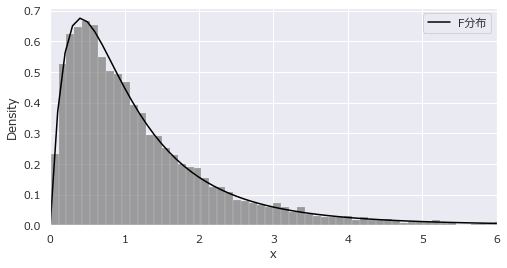

In [26]:
# F比のヒストグラム
sns.histplot(f_value_array, color='gray', stat='density')

# F分布
sns.lineplot(x='x', y='f_distribution', 
             data=f_df, color='black',
             label='F分布')

# X軸範囲
plt.xlim(0, 6)